<a href="https://colab.research.google.com/github/IliaAltmark/spotify_classification/blob/main/jupyter_notebooks/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TODO: Try categorical optimization of Catboost
# Learn more about XGBoost/CatBoost
# check TSNE and other things mentioned in ITC workshop intuit file.
# try encoding the variables based on conditional distribution
# upload to github
# Try additional feature preprocessing especially on the 'loudness' feature

# EDA

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/SpotifyAudioFeatures05012022.csv', index_col=0)

In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence
0,Zedd,Clarity,60wwxj6Dd9NJlirf84wr2c,74,0.509,0.781,8,-3.480,1,0.0720,...,0.00000,0.0749,0.176,128.000,271427,4,0.592,0.700,0.778,0.582
1,Zedd,Stay The Night - Featuring Hayley Williams Of ...,2QtJA4gbwe1AcanB2p21aP,63,0.596,0.738,8,-3.109,1,0.0411,...,0.00000,0.0947,0.461,127.961,217347,4,0.395,0.646,0.720,1.000
2,Zedd,Spectrum,1dFkD1JfRMzwO6hwUsE8aS,59,0.609,0.801,0,-4.417,0,0.0340,...,0.00349,0.1270,0.407,129.990,243413,4,0.299,0.477,0.764,0.646
3,Zedd,Lost At Sea,3Gwq0zKnMWluOEPKh93BeC,47,0.567,0.796,6,-3.534,1,0.0364,...,0.00000,0.1240,0.305,127.983,225840,4,0.478,0.603,0.708,0.987
4,Noir,Around - Solomun Vox,5qA35ZZWFOqynheP5x8rty,56,0.867,0.345,1,-11.042,1,0.0768,...,0.66600,0.1030,0.259,115.000,418594,4,0.383,0.486,0.927,1.000


Let's check the most popular tracks of my favorite artist.

In [ ]:
df[(df.artist_name=='Legowelt') & (df.popularity>25)]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence
157,Legowelt,Elements of Houz Music,7jvXfMFEIY2VcycosxooPP,26,0.702,0.614,11,-9.245,0,0.1880,...,0.868,0.356,0.171,122.008,339779,4,0.270,0.321,0.825,1.000
4924,Legowelt,Axumisia V S612,7j5gCtzTusotzRTGxQF7cm,30,0.432,0.865,1,-7.207,1,0.2760,...,0.862,0.270,0.450,198.008,290732,4,0.000,0.202,0.088,1.000
6953,Legowelt,Disco Rout - Younger Rebinds Remix 2,6UzSvM2MsETALQ1gJUIzCu,33,0.795,0.728,11,-9.069,0,0.0477,...,0.888,0.109,0.417,128.007,345213,4,0.387,0.450,0.904,0.942


Let's check the most popular tracks.

In [ ]:
df[df.popularity>75]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence
5766,Zedd,The Middle,09IStsImFySgyp0pIQdqAc,79,0.753,0.657,7,-3.061,1,0.0449,...,0.000000,0.112,0.437,107.010,184732,4,0.755,0.761,0.418,1.000
6713,Gesaffelstein,Lost in the Fire (feat. The Weeknd),2vXKRlJBXyOcvZYTdNeckS,83,0.658,0.671,2,-12.210,1,0.0363,...,0.000927,0.115,0.166,100.966,202093,4,0.479,0.365,0.451,1.000
8633,ATB,Your Love (9PM),5YaskwnGDZFDRipaqzbwQx,79,0.669,0.784,7,-5.603,1,0.1120,...,0.000006,0.115,0.517,125.993,150053,4,0.717,0.661,0.734,0.883


When we were retrieving the data using the spotify API, we made sure to search only for 'Techno' genre. As we can see here some of the tracks that are quite mainstream considered to be techno as well.

Here we would like to check summary statistics for all features.
We can see here the median popularity. That might be relevant later.
It also looks like Boris Brejcha was very busy as he apears 159 times with different tracks.

In [ ]:
df.describe(include='all')

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence
count,9547,9547,9547,9547.000000,9547.000000,9547.000000,9547.00000,9547.000000,9547.000000,9547.000000,...,9547.000000,9547.000000,9547.000000,9547.000000,9.547000e+03,9547.000000,9529.000000,9529.000000,9529.000000,9529.000000
unique,1316,9214,9547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Boris Brejcha,Time,60wwxj6Dd9NJlirf84wr2c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,159,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.024091,0.683074,0.725992,5.53598,-8.941309,0.537132,0.073911,...,0.637297,0.167442,0.328092,127.643729,3.556184e+05,3.963444,0.466707,0.461592,0.730465,0.921714
std,NaN,NaN,NaN,10.852044,0.135458,0.191204,3.60698,3.705364,0.498645,0.064454,...,0.341376,0.149904,0.234967,16.906192,2.042719e+05,0.269678,0.279037,0.186426,0.229080,0.169292
min,NaN,NaN,NaN,2.000000,0.056800,0.025100,0.00000,-34.628000,0.000000,0.022600,...,0.000000,0.012100,0.017400,48.587000,3.217300e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,17.000000,0.600500,0.590000,2.00000,-10.946000,0.000000,0.042300,...,0.405000,0.089200,0.132000,121.994000,2.524000e+05,4.000000,0.255000,0.342000,0.652000,0.934000
50%,NaN,NaN,NaN,24.000000,0.709000,0.746000,6.00000,-8.731000,1.000000,0.053400,...,0.823000,0.109000,0.277000,125.007000,3.538880e+05,4.000000,0.482000,0.468000,0.802000,1.000000
75%,NaN,NaN,NaN,32.000000,0.791000,0.890000,9.00000,-6.537000,1.000000,0.075200,...,0.890000,0.172000,0.483000,130.007000,4.265595e+05,4.000000,0.669000,0.588000,0.890000,1.000000


## Checking distributions

### Categorical features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

Those are 10 of the busiest artist from 2012 to 2022.

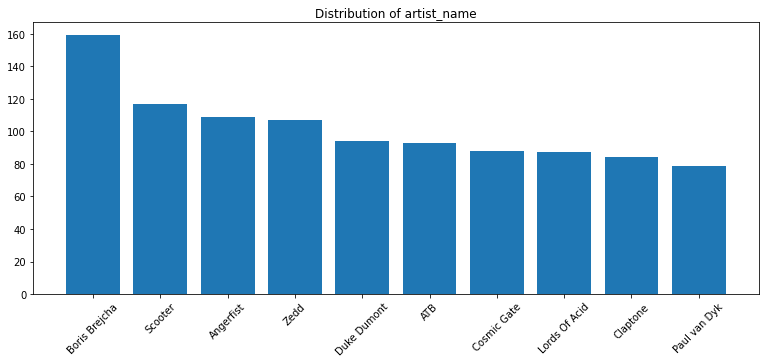

In [ ]:
frequencies = df.artist_name.value_counts()

plt.figure(figsize = (13,5))
ax = plt.bar(frequencies[:10].index, frequencies[:10])
plt.title(f'Distribution of artist_name')
plt.xticks(rotation=45)
plt.show()

The features 'mode' and 'key' are represented as numbers but actually are categorical nominal values. Mode represents whether the song is in a major or minor scale. Major is 1 and minor is 0. Key represents the key of song. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

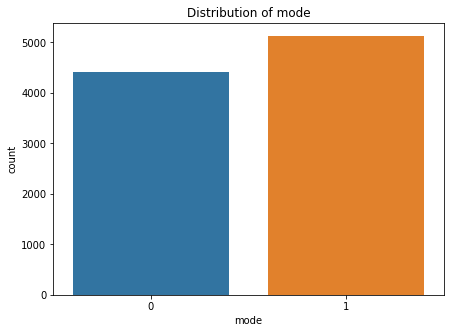

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x='mode', data=df)
plt.title(f'Distribution of mode')
plt.show()

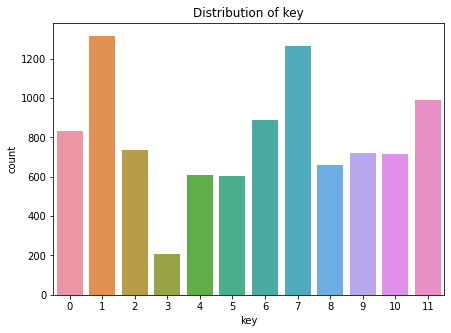

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x='key', data=df)
plt.title(f'Distribution of key')
plt.show()

The most common scale is G Major.

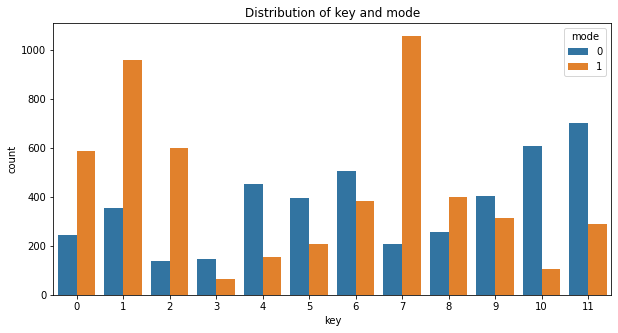

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='key', hue='mode', data=df)
plt.title(f'Distribution of key and mode')
plt.show()

The song features that we get are derived using machine learning and are not always accurate. In this case we got a few values of 1 which is invalid time signature (the values need to be between 3 and 7). Though it does make sense that the most common time signature is 4 (which means 4/4) which is the most common time signature especially in dance music.

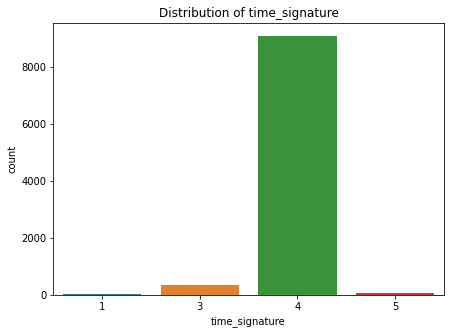

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x='time_signature', data=df)
plt.title(f'Distribution of time_signature')
plt.show()

### Numerical features

We can see a lot of beta distributions and some roughly normal distributions.
For more info on the audio features: 
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

Most tracks have high danceability and energy which makes sense considering the genre supposed to be Techno.

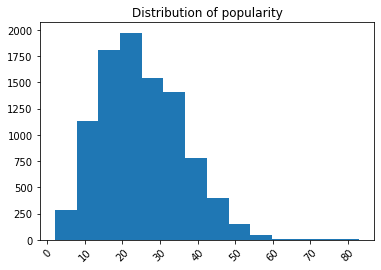

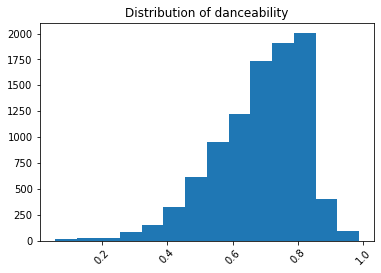

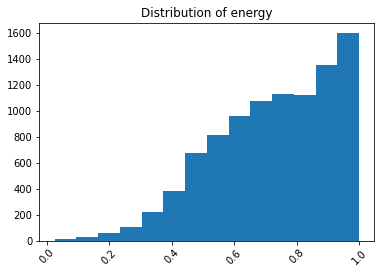

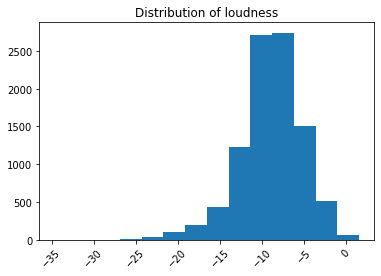

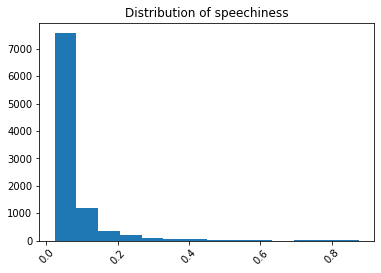

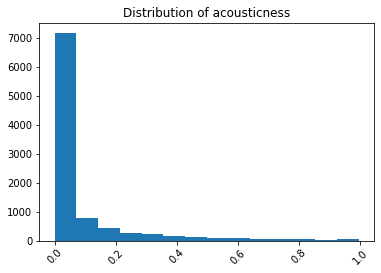

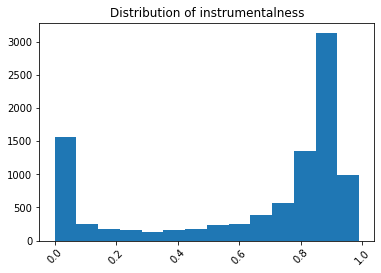

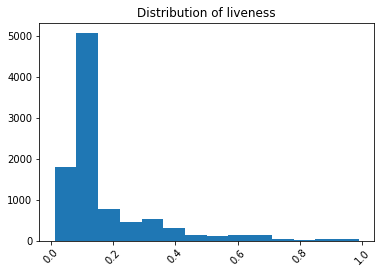

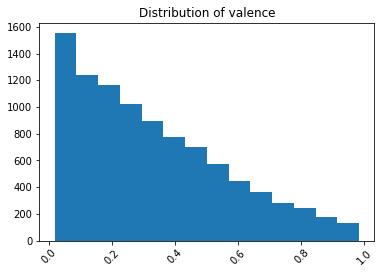

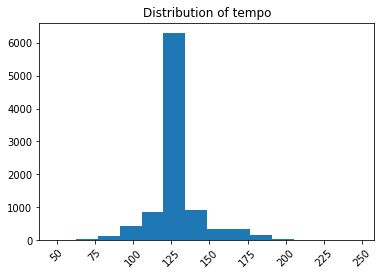

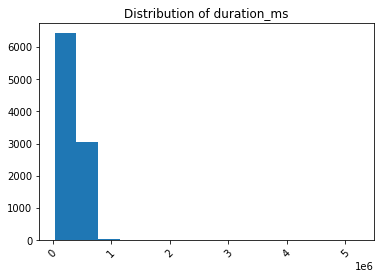

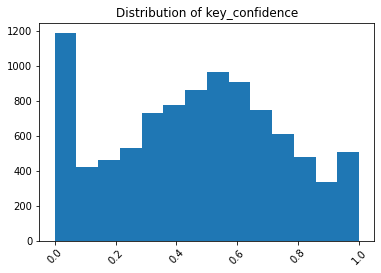

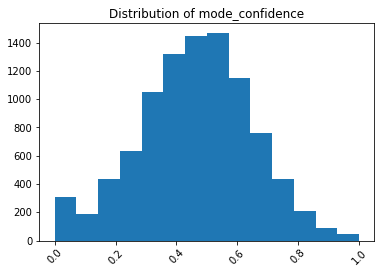

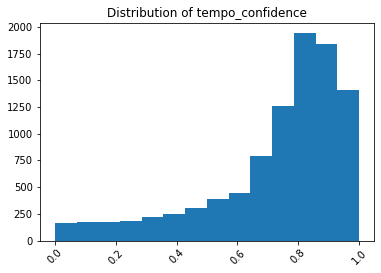

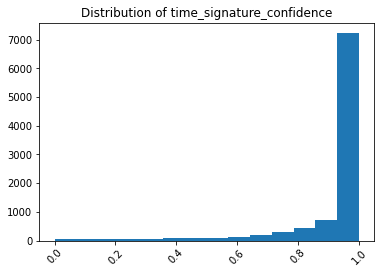

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.drop(['key', 'mode', 'time_signature'])
for num in numerical:
    plt.hist(num, data=df, bins=14)
    plt.title(f'Distribution of {num}')
    plt.xticks(rotation=45)
    plt.show()

## Checking NaNs

There are some NaNs.

In [ ]:
df.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]

key_confidence               18
mode_confidence              18
tempo_confidence             18
time_signature_confidence    18
dtype: int64

The main idea of this project is to see if it's possible to build a model which will be able to predict whether the track is going to be popular or not while focusing on only one genre. We'll build a classification model where the output is going to be 0 and 1, where 0 means the track is not going to be popular and 1 means the track is going to be popular.


The next step would be to determine what is popular and what is not.

# New feature: popular_bin

The new feature will be based on the median of the popularity feature. It might be somewhat arbitrary but that's what we'll be using for this genre.

In order to have less data leakage we'll first split the data to train/val/test and then derive the median popularity from the train set.

## split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, 
                               test_size=0.3, 
                               random_state=42)

val, test = train_test_split(test, 
                             test_size=0.66, 
                             random_state=42)

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

print("TRAIN Dataset: {}".format(train.shape))
print("VAL Dataset: {}".format(val.shape))
print("TEST Dataset: {}".format(test.shape))

TRAIN Dataset: (6682, 21)
VAL Dataset: (974, 21)
TEST Dataset: (1891, 21)


## Feature creation

In [ ]:
t_median = train['popularity'].median()

print(f'The median is {t_median}')

train['popularity_bin'] = (train['popularity'] > t_median).astype('int')
val['popularity_bin'] = (val['popularity'] > t_median).astype('int')
test['popularity_bin'] = (test['popularity'] > t_median).astype('int')

The median is 24.0


The labels are mostly balanced.

In [ ]:
frequencies = train.popularity_bin.value_counts()
frequencies

0    3413
1    3269
Name: popularity_bin, dtype: int64

## Additional EDA

Checking distributions with the added feature.

### Categorical

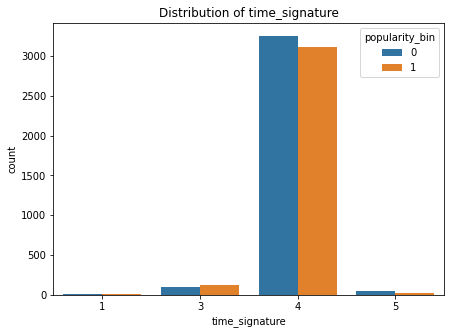

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x='time_signature', hue='popularity_bin', data=train)
plt.title(f'Distribution of time_signature')
plt.show()

### Numerical

We can see there are some minor differences between the two labels.
E.g. We can see that there are more tracks with high energy among the popular tracks compared to others.

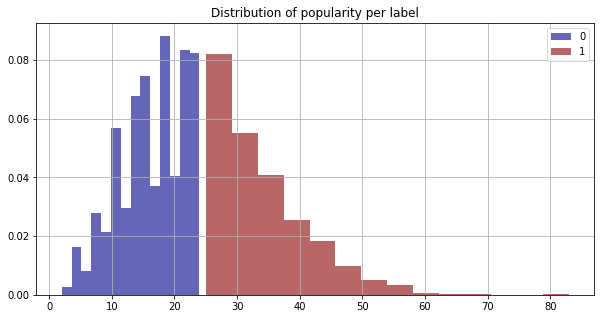

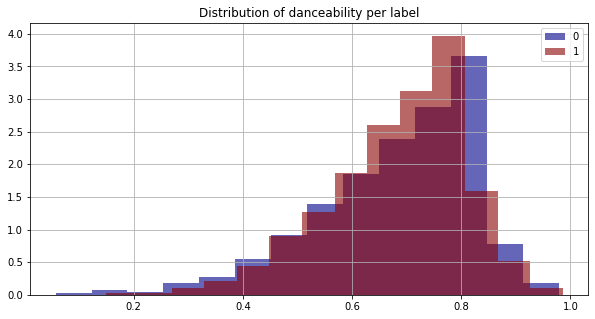

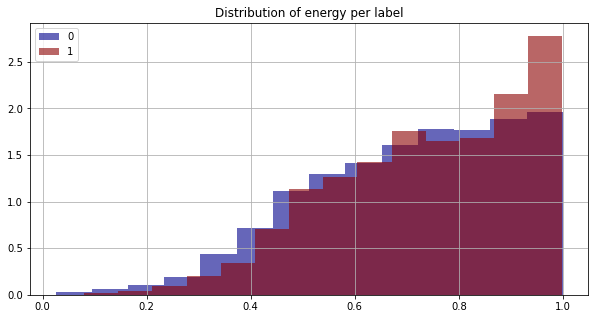

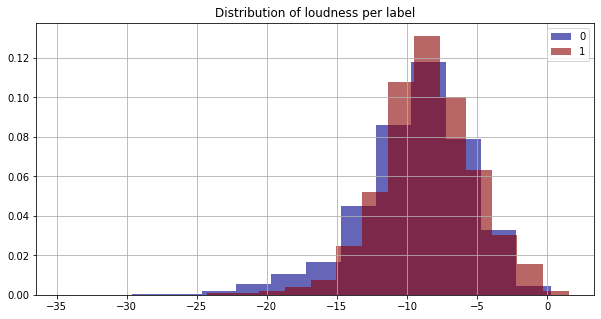

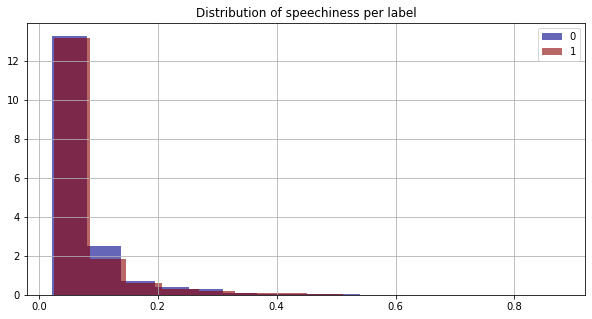

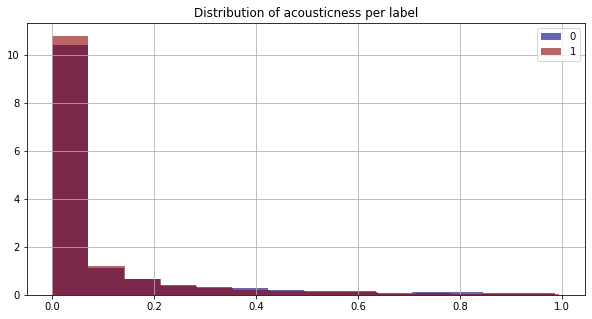

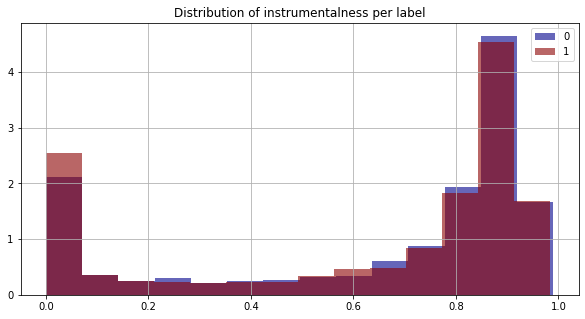

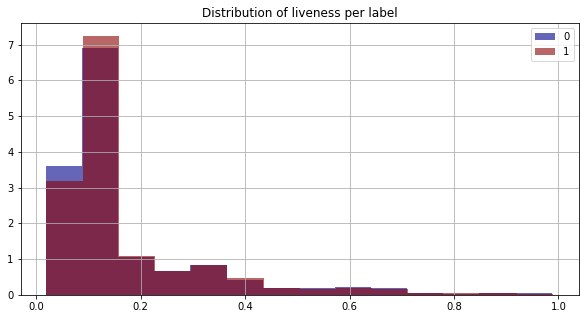

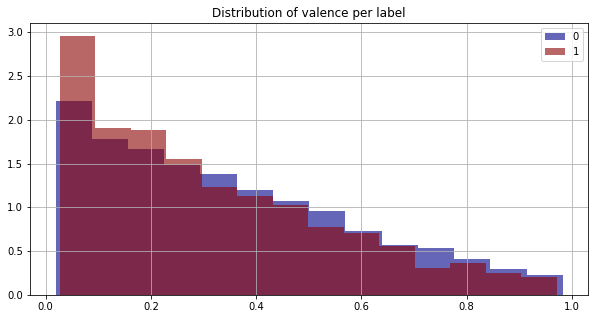

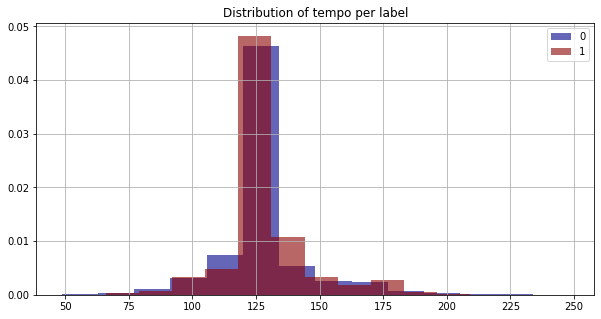

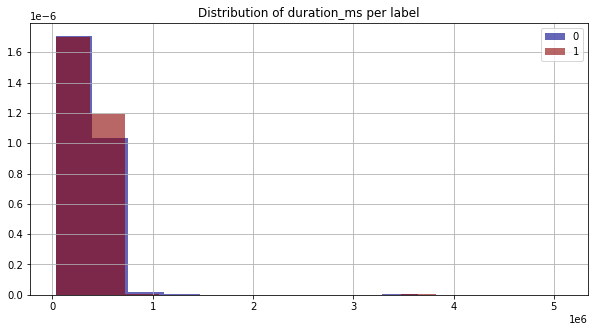

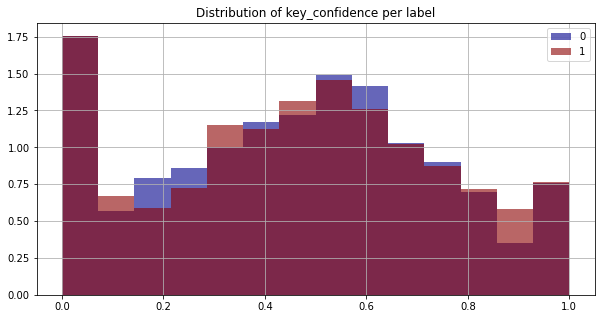

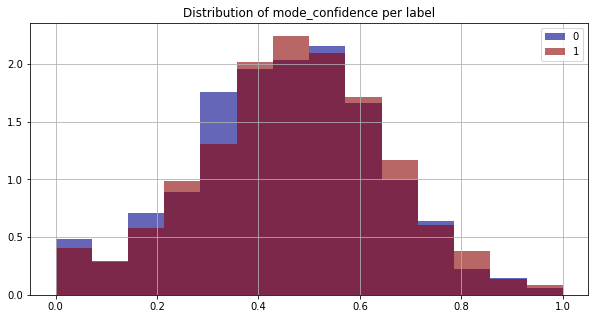

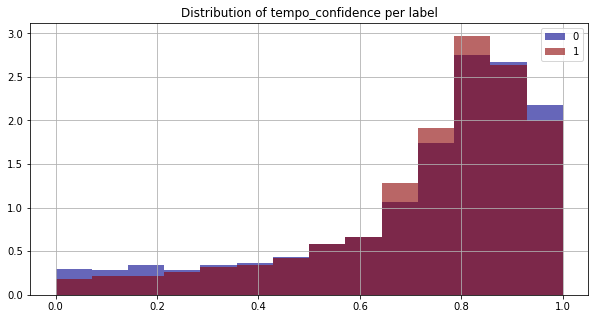

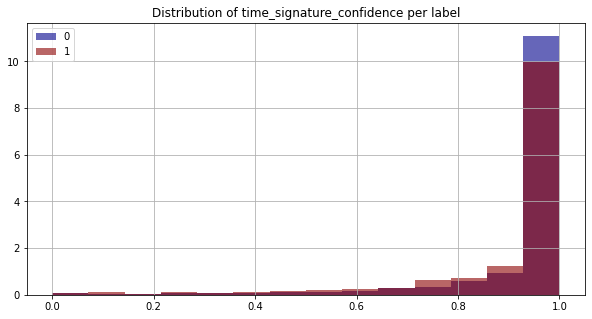

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)

motm_0 = train[train['popularity_bin']==0]
motm_1 = train[train['popularity_bin']==1]

for num in numerical:
    plt.hist(motm_0[num], 
             bins=14,
             color='darkblue',
             label='0', 
             alpha=0.6, 
             density=True)
    plt.hist(motm_1[num], 
             bins=14, 
             color='darkred', 
             label='1', 
             alpha=0.6, 
             density=True)
    plt.grid()
    plt.legend()
    plt.title(f'Distribution of {num} per label')
    plt.show()

Here we check correlation between the numeric features. unsurprisingly there's a high correlation between energy and loudness. For now we'll keep both of the features. We can also see a high correlation between key and mode confidence.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


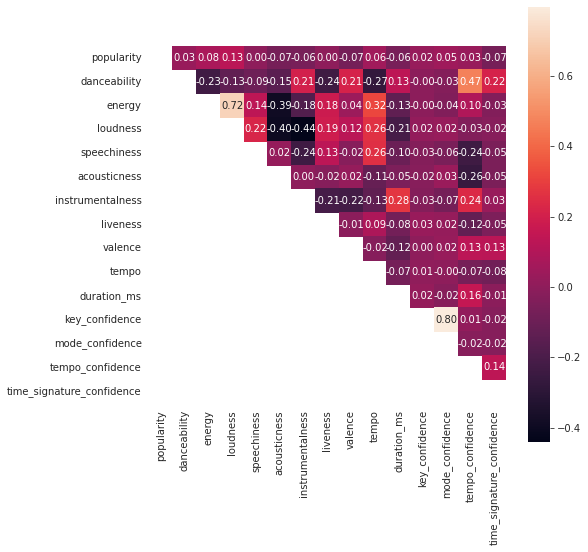

In [ ]:
cor = train[numerical].corr()
mask = np.tril(np.ones_like(cor, dtype=np.bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(cor, annot=True, fmt=".2f", mask = mask, square = True)

# Replacing Nan values

We'll replace the Nan's using the means of the train dataset.

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

train[numerical] = imp.fit_transform(train[numerical])
val[numerical] = imp.transform(val[numerical])
test[numerical] = imp.transform(test[numerical])

In [ ]:
train.isna().sum(axis=0)[train.isna().sum(axis=0) > 0]

Series([], dtype: int64)

# Simple modeling and feature importance

## Simple Logistic Regression

I don't want to use artist's name or the track name because I want the model to learn based on the audio features and not rely on the names of popular artists.

In [ ]:
features = train.select_dtypes(include=['int64', 'float64']).columns.drop(['popularity', 'popularity_bin'])
label = 'popularity_bin'

X_train = train[features]
y_train = train[label]

X_val = val[features]
y_val = val[label]

X_test = test[features]
y_test = test[label]

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       486
           1       0.54      0.55      0.54       488

    accuracy                           0.54       974
   macro avg       0.54      0.54      0.54       974
weighted avg       0.54      0.54      0.54       974



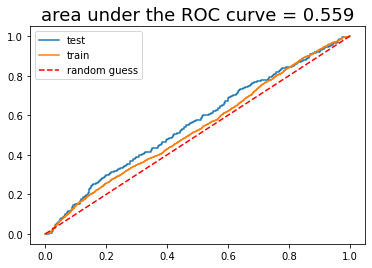

In [ ]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.loc[fpr_tpr.dist.argmin(), 'thresholds']


def get_model_results(model, x_train, x_test, y_train, y_test):
    probabilities = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(x_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {:.3f}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()

model = LogisticRegression()
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

## Logistic Regression with normalization

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       486
           1       0.59      0.50      0.54       488

    accuracy                           0.57       974
   macro avg       0.58      0.57      0.57       974
weighted avg       0.58      0.57      0.57       974



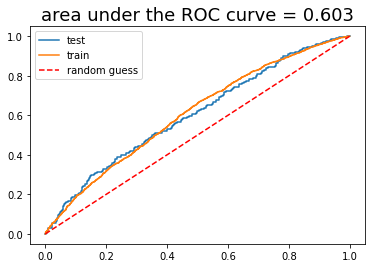

In [ ]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

Checking the coefficients

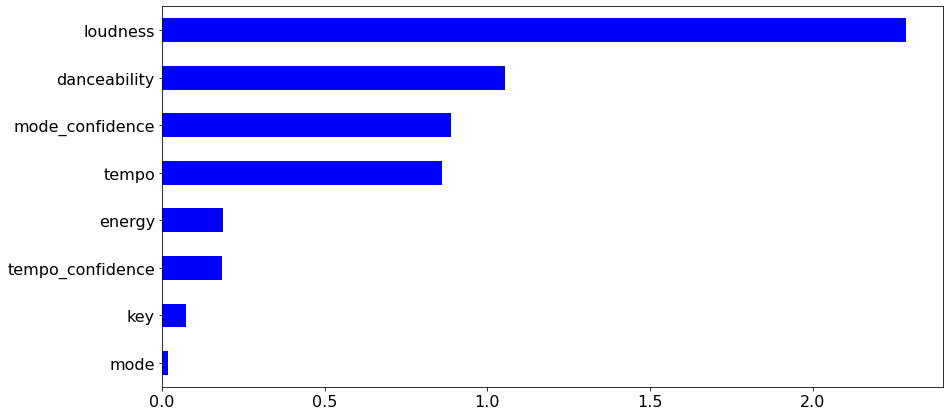

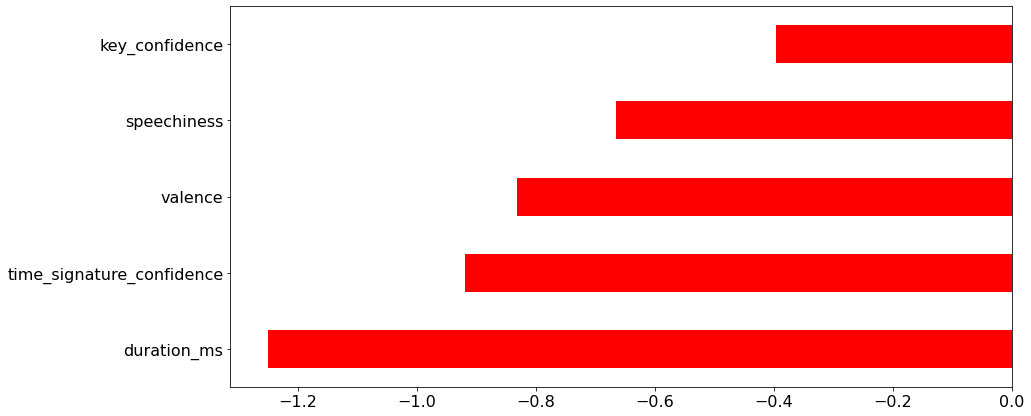

In [ ]:
feature_importance = pd.Series(index=X_train.columns , data= model.named_steps['logisticregression'].coef_[0])
feature_importance = feature_importance.sort_values()
plt.figure()
feature_importance.tail(8).plot.barh(fontsize=16, figsize=(14,7), color='b' )
plt.figure()
feature_importance.head(5).plot.barh(fontsize=16, figsize=(14,7), color='r')

## Logistic regression with Polynomial features

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.58      0.62      0.60       486
           1       0.59      0.55      0.57       488

    accuracy                           0.59       974
   macro avg       0.59      0.59      0.58       974
weighted avg       0.59      0.59      0.58       974



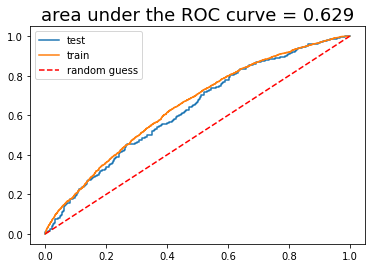

In [ ]:
model = make_pipeline(PolynomialFeatures(),MinMaxScaler(),LogisticRegression())
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

# Preprocessing

I would like to remove about 10% of the data which is on the border between popular/not-popular. That way our model might be more effective at distinguishing between popular/not-popular.

In [ ]:
quantile_5 = train[train['popularity_bin']==1]['popularity'].quantile(0.05)
print(f"The 5% quantile for popular tracks: {quantile_5}")

quantile_5_sum_r = sum(train[train['popularity_bin']==1]['popularity']<=quantile_5)
print(f"Number of tracks that will be removed: {quantile_5_sum_r}")

The 5% quantile for popular tracks: 25.0
Number of tracks that will be removed: 261


In [ ]:
quantile_95 = train[train['popularity_bin']==0]['popularity'].quantile(0.95)
print(f"The 95% quantile for not-popular tracks: {quantile_95}")

quantile_95_sum_r = sum(train[train['popularity_bin']==0]['popularity']>=quantile_95)
print(f"Number of tracks that will be removed: {quantile_95_sum_r}")

The 95% quantile for not-popular tracks: 24.0
Number of tracks that will be removed: 208


In [ ]:
train = train[(train['popularity']<quantile_95)|(train['popularity']>quantile_5)].copy()

In [ ]:
train.shape

(6213, 22)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.59      0.56      0.58       486
           1       0.58      0.61      0.60       488

    accuracy                           0.59       974
   macro avg       0.59      0.59      0.59       974
weighted avg       0.59      0.59      0.59       974



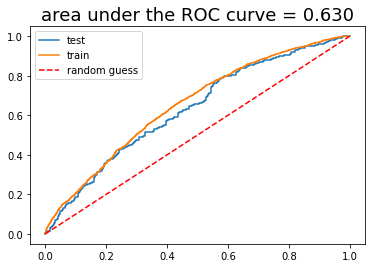

In [ ]:
X_train = train[features]
y_train = train[label]

model = make_pipeline(PolynomialFeatures(),MinMaxScaler(),LogisticRegression())
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

## Outliers

Next we'll deal with outliers

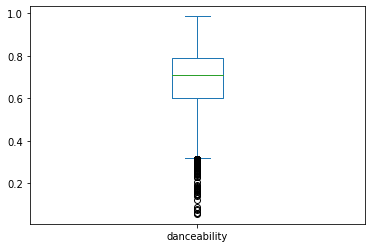

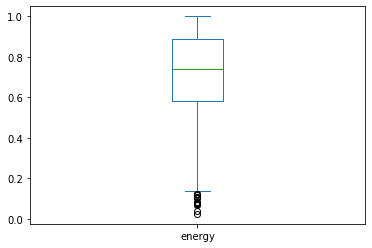

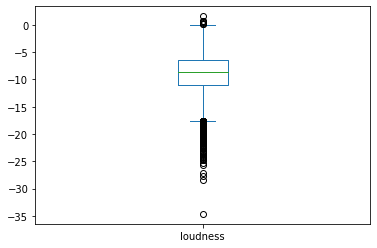

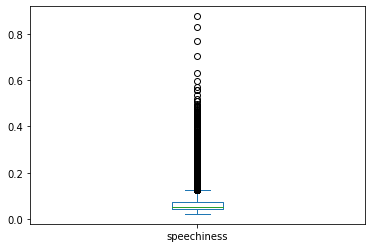

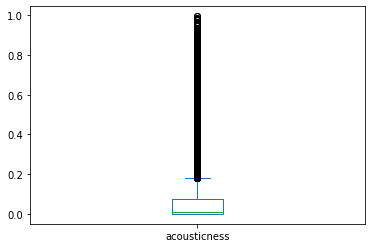

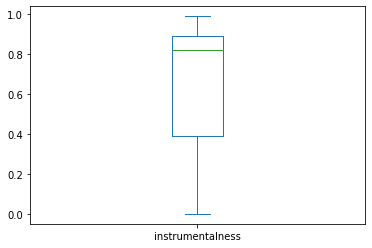

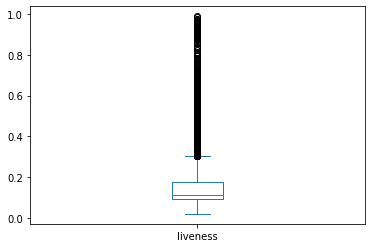

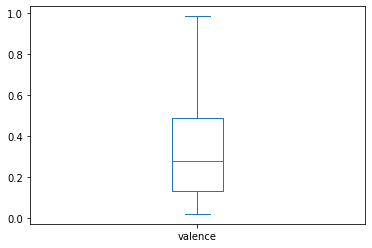

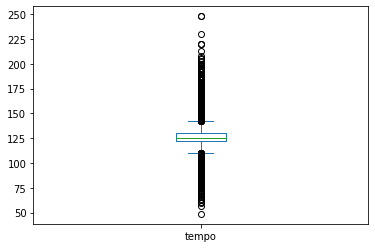

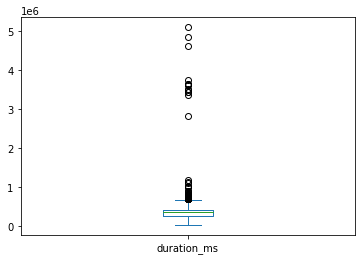

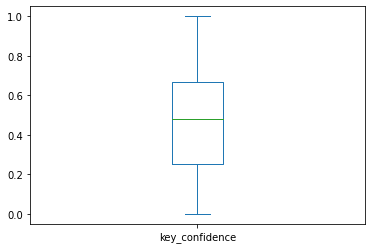

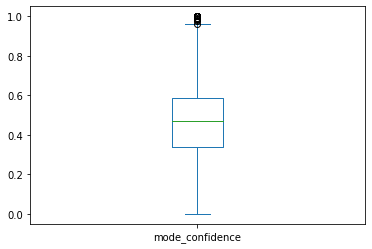

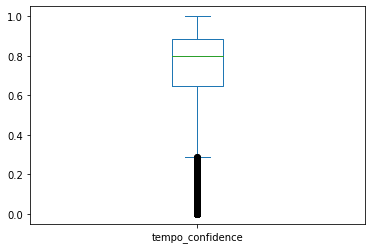

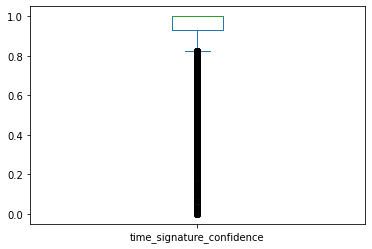

In [ ]:
numerical = numerical.drop('popularity')

for col in numerical:
  X_train[col].plot.box()
  plt.show()

In [ ]:
train_len_before = len(X_train)

In [ ]:
def remove_outliers(df_train, df_val, df_test, cols):
  for col in cols:
    std = df_train[col].std()
    mean = df_train[col].mean()
    bottom_bound = max(mean - 3 * std, 0)
    top_bound = mean + 3 * std

    num_of_outliers = ((df_train[col] < bottom_bound) | (df_train[col] > top_bound)).sum()
    print(f'Ratio of outliers for column {col}: {num_of_outliers / len(df_train)}')

    if num_of_outliers / len(df_train) < 0.025:
      df_train = df_train[df_train[col].between(bottom_bound, top_bound)]
    else:
      df_train.loc[df_train[col]>top_bound, col] = top_bound
      df_train.loc[df_train[col]<bottom_bound, col] = bottom_bound
    
    df_val.loc[df_val[col]>top_bound, col] = top_bound
    df_val.loc[df_val[col]<bottom_bound, col] = bottom_bound

    df_test.loc[df_test[col]>top_bound, col] = top_bound
    df_test.loc[df_test[col]<bottom_bound, col] = bottom_bound
  
  return df_train, df_val, df_test

In [ ]:
train, X_val, X_test = remove_outliers(train, X_val, X_test, numerical.drop('loudness'))

Ratio of outliers for column danceability: 0.00740383067761146
Ratio of outliers for column energy: 0.00340522133938706
Ratio of outliers for column speechiness: 0.024894240156199152
Ratio of outliers for column acousticness: 0.03270482229267479
Ratio of outliers for column instrumentalness: 0.0
Ratio of outliers for column liveness: 0.03136993158685133
Ratio of outliers for column valence: 0.0
Ratio of outliers for column tempo: 0.024028032704822292
Ratio of outliers for column duration_ms: 0.0032484185330825784
Ratio of outliers for column key_confidence: 0.0
Ratio of outliers for column mode_confidence: 0.0
Ratio of outliers for column tempo_confidence: 0.017667238421955403
Ratio of outliers for column time_signature_confidence: 0.03335079448227694


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
train.shape

(5727, 22)

In [ ]:
print(f'''Current ratio of rows (out of before the deletion): 
train - {len(train) / train_len_before}''')

Current ratio of rows (out of before the deletion): 
train - 0.9217769193626267


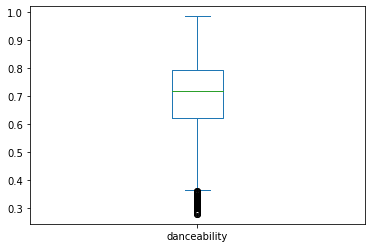

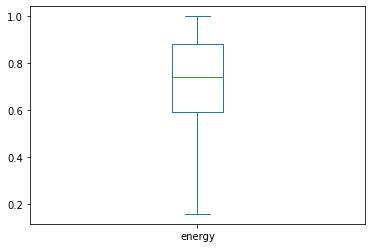

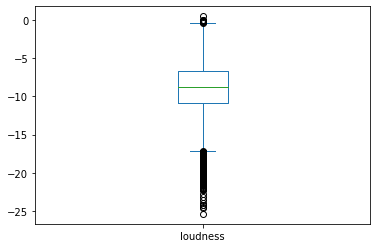

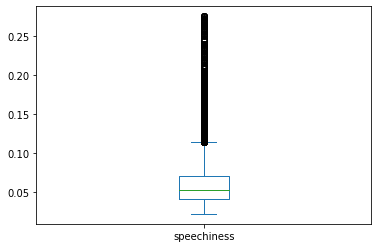

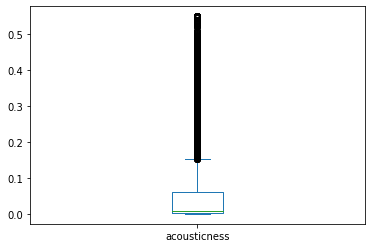

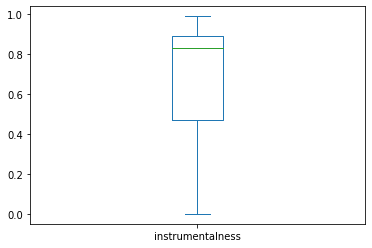

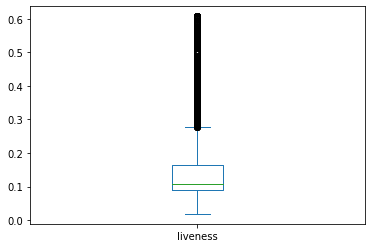

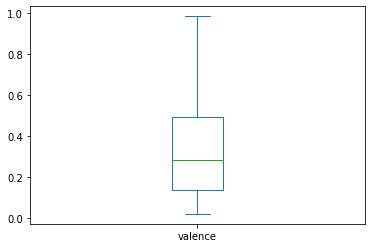

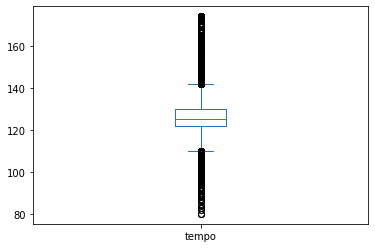

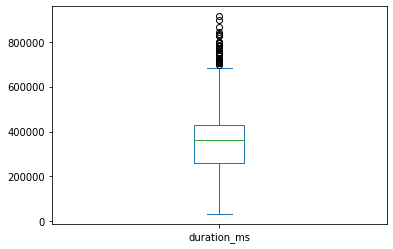

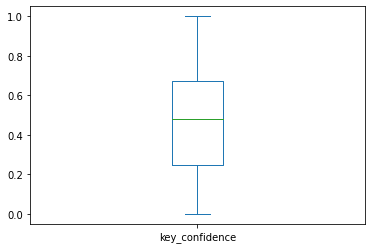

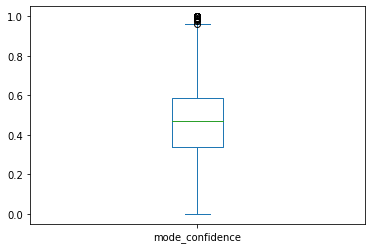

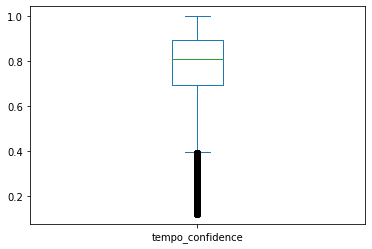

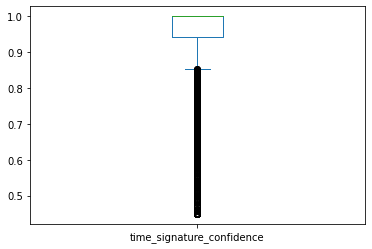

In [ ]:
for col in numerical:
  train[col].plot.box()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


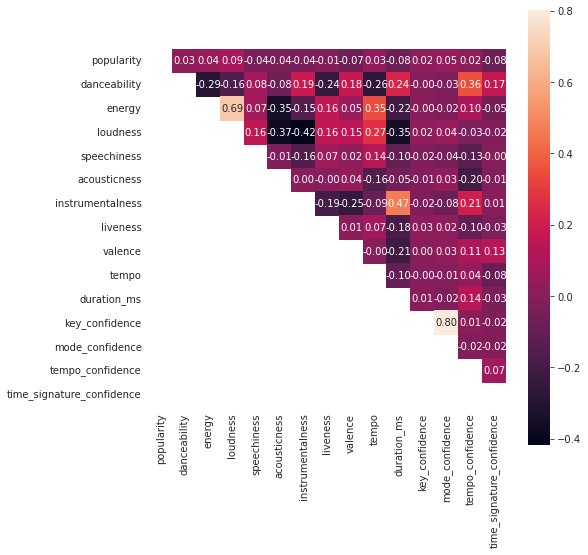

In [ ]:
numerical_h = df.select_dtypes(include=['int64', 'float64']).columns.drop(['key', 'mode', 'time_signature'])

cor = train[numerical_h].corr()
mask = np.tril(np.ones_like(cor, dtype=np.bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(cor, annot=True, fmt=".2f", mask = mask, square = True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.60      0.63      0.61       486
           1       0.61      0.58      0.60       488

    accuracy                           0.61       974
   macro avg       0.61      0.61      0.61       974
weighted avg       0.61      0.61      0.61       974



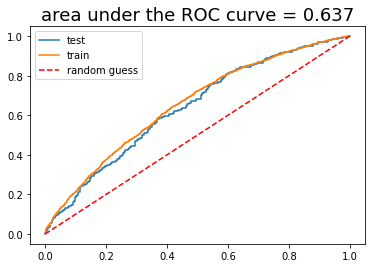

In [ ]:
X_train = train[features]
y_train = train[label]

model = make_pipeline(PolynomialFeatures(),MinMaxScaler(),LogisticRegression())
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

# Other Models

## random forest

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       486
           1       0.64      0.59      0.61       488

    accuracy                           0.62       974
   macro avg       0.63      0.62      0.62       974
weighted avg       0.63      0.62      0.62       974



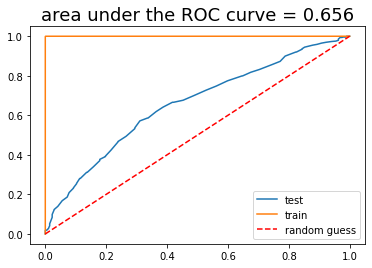

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       486
           1       0.61      0.61      0.61       488

    accuracy                           0.61       974
   macro avg       0.61      0.61      0.61       974
weighted avg       0.61      0.61      0.61       974



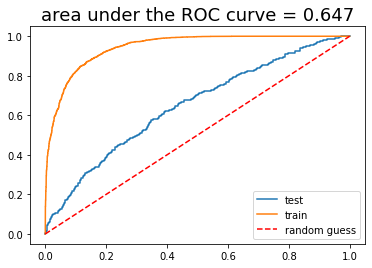

In [ ]:
model = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

In [ ]:
from sklearn import tree
from os import system

tree_dot_path = "tree1.dot"
tree_png_path = "tree1.png"
dotfile = open(tree_dot_path, 'w')
tree.export_graphviz(model.estimators_[10], out_file = dotfile, 
                     feature_names = X_train.columns, 
                     filled=True)
dotfile.close()
system("dot -Tpng {tree_dot_path} -o {tree_png_path}".format(
        tree_dot_path=tree_dot_path, tree_png_path=tree_png_path));

## XGBoost

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       486
           1       0.61      0.65      0.63       488

    accuracy                           0.62       974
   macro avg       0.62      0.62      0.62       974
weighted avg       0.62      0.62      0.62       974



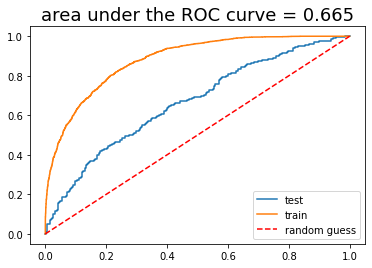

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5, 
                      n_estimators=80, 
                      random_state=42)
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

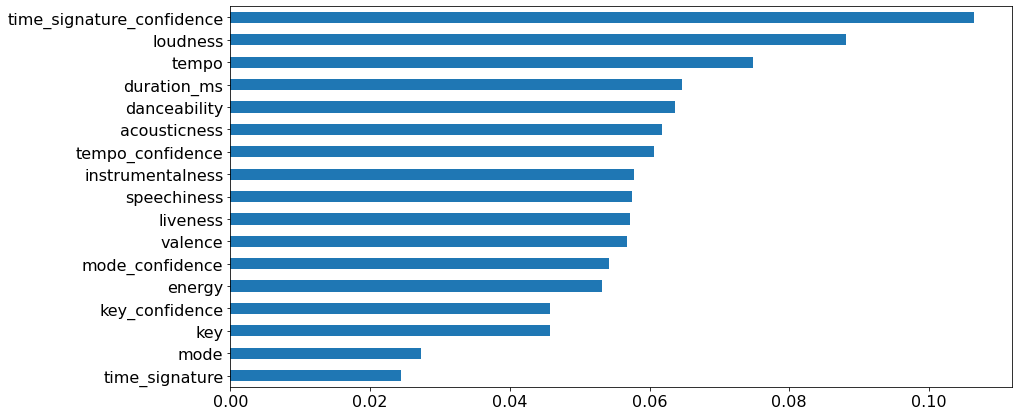

In [ ]:
import xgboost as xgb
feature_importance = pd.Series(index=X_train.columns , data= model.feature_importances_)
feature_importance = feature_importance.sort_values()
feature_importance.tail(20).plot.barh(fontsize=16, figsize=(14,7));

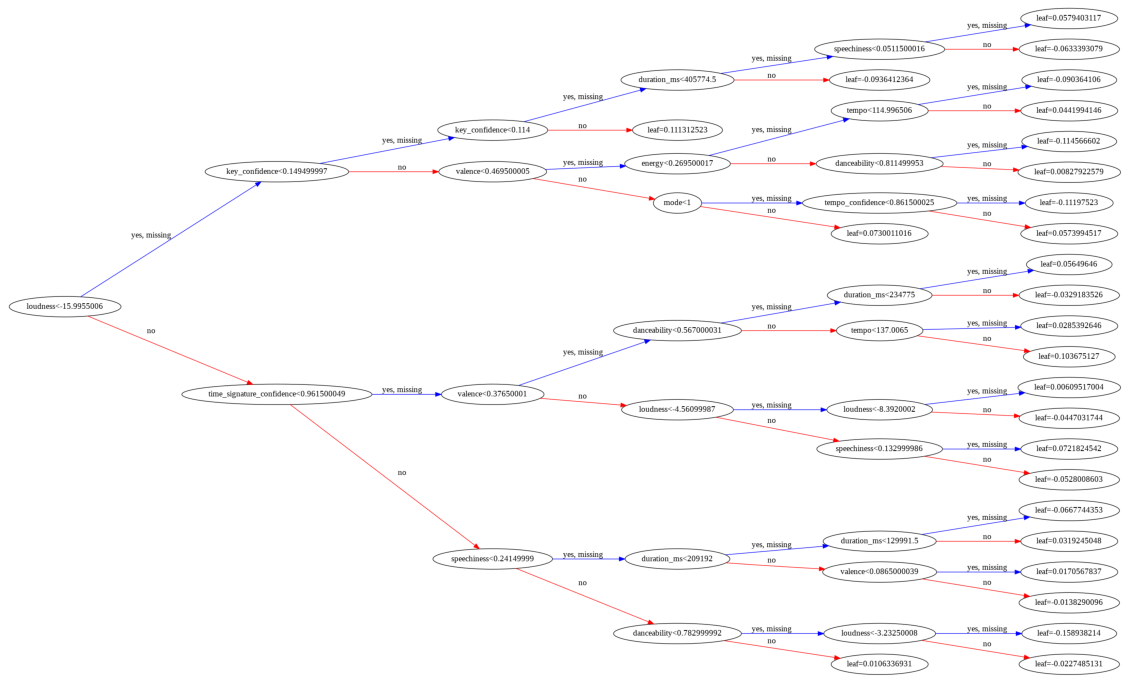

In [ ]:
import matplotlib
from xgboost import plot_tree
from matplotlib.pylab import rcParams
ax = plot_tree(model,num_trees=10, rankdir='LR')
fig = ax.figure
fig.set_size_inches(20, 20)


## XGBoost - with polynomial features

In [ ]:
poly = PolynomialFeatures(2)
train_poly_features = poly.fit_transform(X_train[numerical])
val_poly_features = poly.transform(X_val[numerical])
test_poly_features = poly.transform(X_test[numerical])

train_with_poly_features = pd.concat([X_train.reset_index(drop=True),pd.DataFrame(train_poly_features)],axis=1)
val_with_poly_features = pd.concat([X_val.reset_index(drop=True),pd.DataFrame(val_poly_features)],axis=1)
test_with_poly_features = pd.concat([X_test.reset_index(drop=True),pd.DataFrame(test_poly_features)],axis=1)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       486
           1       0.60      0.66      0.63       488

    accuracy                           0.61       974
   macro avg       0.61      0.61      0.61       974
weighted avg       0.61      0.61      0.61       974



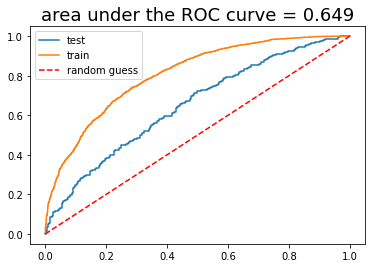

In [ ]:
model = XGBClassifier(random_state=42)
model.fit(train_with_poly_features, y_train)

get_model_results(model, train_with_poly_features, val_with_poly_features, y_train, y_val)

# Saving the datasets

In [ ]:
# train.to_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/train.csv')

# X_val.to_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/X_val.csv')
# y_val.to_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/y_val.csv')

# X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/X_test.csv')
# y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Spotify DA/Data/y_test.csv')

# Trying other models

## KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.50      0.89      0.64       486
           1       0.51      0.11      0.18       488

    accuracy                           0.50       974
   macro avg       0.50      0.50      0.41       974
weighted avg       0.50      0.50      0.41       974



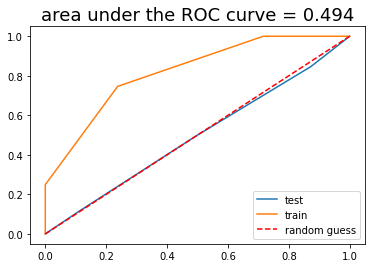

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

## CatBoost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.6 MB/s 


In [ ]:
from catboost import CatBoostClassifier, metrics, Pool

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       486
           1       0.64      0.65      0.64       488

    accuracy                           0.64       974
   macro avg       0.64      0.64      0.64       974
weighted avg       0.64      0.64      0.64       974



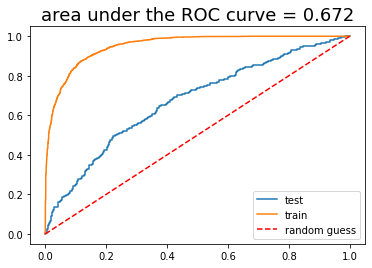

In [ ]:
model = CatBoostClassifier(
    random_seed=42,
    logging_level='Silent'
)

model.fit(X_train, y_train)

get_model_results(model, X_train, X_val, y_train, y_val)

In [ ]:
# categorical_features_indices = ['key', 'mode', 'time_signature']

In [ ]:
params = {
    'depth': 6, 
    'iterations': 2000,
    'learning_rate': 0.01,
    'random_seed': 42,
    'eval_metric': metrics.AUC(),
    'logging_level': 'Silent',
    'use_best_model': True,
    'od_type': 'Iter',
    'od_wait': 200
}
train_pool = Pool(X_train, y_train)
validate_pool = Pool(X_val, y_val)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       486
           1       0.66      0.58      0.61       488

    accuracy                           0.64       974
   macro avg       0.64      0.64      0.64       974
weighted avg       0.64      0.64      0.64       974



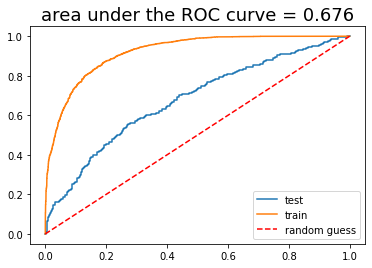

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

get_model_results(model, X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       928
           1       0.61      0.64      0.62       963

    accuracy                           0.61      1891
   macro avg       0.61      0.61      0.61      1891
weighted avg       0.61      0.61      0.61      1891



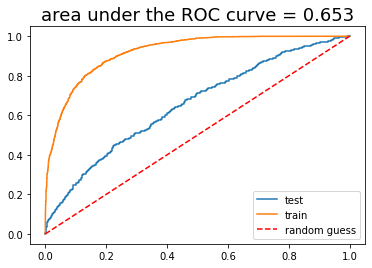

In [ ]:
get_model_results(model, X_train, X_test, y_train, y_test)

## AdaBoost

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       486
           1       0.60      0.64      0.62       488

    accuracy                           0.60       974
   macro avg       0.60      0.60      0.60       974
weighted avg       0.60      0.60      0.60       974



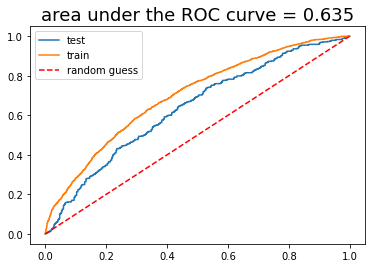

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=80, 
                           random_state=42)
model.fit(X_train, y_train)
get_model_results(model, X_train, X_val, y_train, y_val)

# Optimizing Catboost

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 18.0 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 210 kB 58.2 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 112 kB 61.0 MB/s 
     |████████████████████████████████| 146 kB 58.9 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=5ac34ddc4f86d1f6022ddc7c2da5c31bfa45aea68f560452914d1c010650fad5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# params = {
#     'depth': 6, 
#     'iterations': 2000,
#     'learning_rate': 0.01,
#     'random_seed': 42,
#     'eval_metric': metrics.AUC(),
#     'logging_level': 'Silent',
#     'use_best_model': True,
#     'od_type': 'Iter',
#     'od_wait': 200
# }
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

In [ ]:
def calc_test_quality(train_pool=train_pool, val_pool=val_pool, test_pool=test_pool, **kwargs):
    model = CatBoostClassifier(**kwargs)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(test_pool)
    return model, eval_metric(test_pool.get_label(), y_pred[:, 1], 'AUC')

In [ ]:
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric


def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'depth': trial.suggest_int('depth', 4, 8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'iterations': 3000,
        'random_seed': 42,
        'eval_metric': metrics.AUC(),
        'logging_level': 'Silent',
        'use_best_model': True,
        'od_type': 'Iter',
        'od_wait': 200
    }

    model = CatBoostClassifier(**params)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(val_pool)
    return eval_metric(val_pool.get_label(), y_pred[:, 1], 'AUC')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=70)

[I 2022-05-18 18:09:16,558] A new study created in memory with name: no-name-2445e0cd-3bd8-4d8a-a65b-1e7df0e25f80
[I 2022-05-18 18:09:19,119] Trial 0 finished with value: 0.6732063347500507 and parameters: {'learning_rate': 0.03634111335190378, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.6732063347500507.
[I 2022-05-18 18:09:34,445] Trial 1 finished with value: 0.6697530864197531 and parameters: {'learning_rate': 0.024039790705600746, 'depth': 8, 'l2_leaf_reg': 7.1634676472637695, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.6732063347500507.
[I 2022-05-18 18:09:37,487] Trial 2 finished with value: 0.6705162585171692 and parameters: {'learning_rate': 0.020443010726789126, 'depth': 7, 'l2_leaf_reg': 4.947150202116619, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.6732063347500507.
[I 2022-05-18 18:09:39,910] Trial 3 finished with value: 0.6765710382513661 and parameters: {'learning_rate': 0.0382097932579

In [ ]:
best_params = {
    'depth': study.best_params['depth'], 
    'boosting_type': study.best_params['boosting_type'],
    'l2_leaf_reg': study.best_params['l2_leaf_reg'],
    'learning_rate': study.best_params['learning_rate'],
    'iterations': 3000,
    'random_seed': 42,
    'eval_metric': metrics.AUC(),
    'logging_level': 'Silent',
    'use_best_model': True,
    'od_type': 'Iter',
    'od_wait': 200
}

In [ ]:
# best params: 
# ([0.653434624198804],
#  {'boosting_type': 'Plain',
#   'depth': 6,
#   'l2_leaf_reg': 7.368808704421745,
#   'learning_rate': 0.012446929729117526})

opt_catboost, auc = calc_test_quality(**best_params)
auc, study.best_params

([0.653434624198804],
 {'boosting_type': 'Plain',
  'depth': 6,
  'l2_leaf_reg': 7.368808704421745,
  'learning_rate': 0.012446929729117526})

## Results on validation set

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       486
           1       0.66      0.58      0.62       488

    accuracy                           0.64       974
   macro avg       0.64      0.64      0.64       974
weighted avg       0.64      0.64      0.64       974



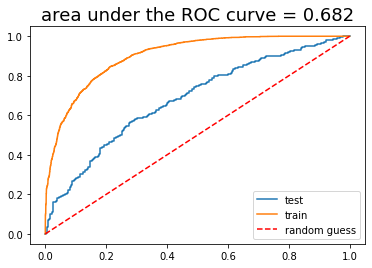

In [ ]:
get_model_results(opt_catboost, X_train, X_val, y_train, y_val)

## Results on test set

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       928
           1       0.63      0.56      0.59       963

    accuracy                           0.61      1891
   macro avg       0.61      0.61      0.61      1891
weighted avg       0.61      0.61      0.61      1891



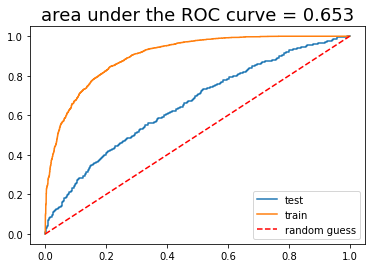

In [ ]:
get_model_results(opt_catboost, X_train, X_test, y_train, y_test)